In [49]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = load_dataset("./emotion")

C:\Users\aryan\anaconda3\Lib\site-packages\datasets\load.py:929: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at ./emotion\emotion.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
# Access training, validation, and test data (modify key names if needed)
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

In [7]:
# Define features and target labels
text_column = "text"
label_column = "label"

In [8]:
# Load stopwords (English by default)
stop_words = stopwords.words('english')

In [9]:
# Function to remove stopwords (customize if needed)
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stop_words])

In [10]:
# Extract text and labels with stopword removal
train_texts = [remove_stopwords(text) for text in train_data[text_column]]
train_labels = train_data[label_column]

In [11]:
train_texts

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone cares awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligrams times recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas years feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corners life sign agent let alone publishing contract feels little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental dolls child began collecti

In [16]:
validation_texts = [remove_stopwords(text) for text in validation_data[text_column]]
validation_labels = validation_data[label_column]

In [17]:
test_texts = [remove_stopwords(text) for text in test_data[text_column]]
test_labels = test_data[label_column]

In [18]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
train_features = vectorizer.fit_transform(train_texts)
validation_features = vectorizer.transform(validation_texts)
test_features = vectorizer.transform(test_texts)

In [19]:
# SVC Model
from sklearn.svm import SVC

# Train the SVC model
svc_model = SVC(kernel='linear')  # Choose kernel as needed (e.g., 'rbf')
svc_model.fit(train_features, train_labels)

SVC(kernel='linear')

In [20]:
# Evaluate on validation set (optional, but recommended)
from sklearn.metrics import accuracy_score
validation_predictions = svc_model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.8870


In [21]:
# Make predictions on the test set
svc_test_predictions = svc_model.predict(test_features)

In [22]:
# Evaluate on test set
svc_accuracy = accuracy_score(test_labels, svc_test_predictions)
print(f"Test Accuracy: {svc_accuracy:.4f}")

Test Accuracy: 0.8830


In [23]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(train_features, train_labels)

RandomForestClassifier(random_state=42)

In [40]:
# Evaluate on validation set (optional, but recommended)
from sklearn.metrics import accuracy_score
validation_predictions = rf_model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.8935


In [41]:
# Make predictions on the test set
rf_test_predictions = rf_model.predict(test_features)

In [42]:
# Evaluate on test set
rf_accuracy = accuracy_score(test_labels, rf_test_predictions)
print(f"Test Accuracy: {rf_accuracy:.4f}")

Test Accuracy: 0.8880


In [26]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(train_features, train_labels)

DecisionTreeClassifier()

In [27]:
# Evaluate on validation set (optional, but recommended)
from sklearn.metrics import accuracy_score
validation_predictions = dt_model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.8750


In [28]:
# Make predictions on the test set
dt_test_predictions = dt_model.predict(test_features)

In [29]:
# Evaluate on test set
dt_accuracy = accuracy_score(test_labels, dt_test_predictions)
print(f"Test Accuracy: {dt_accuracy:.4f}")

Test Accuracy: 0.8700


In [30]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(train_features, train_labels)

C:\Users\aryan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Evaluate on validation set (optional, but recommended)
from sklearn.metrics import accuracy_score
validation_predictions = lr_model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.8735


In [32]:
# Make predictions on the test set
lr_test_predictions = lr_model.predict(test_features)

In [33]:
# Evaluate on test set
lr_accuracy = accuracy_score(test_labels, lr_test_predictions)
print(f"Test Accuracy: {lr_accuracy:.4f}")

Test Accuracy: 0.8645


In [34]:
# XGBoost Classifier
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_features, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
# Evaluate on validation set (optional, but recommended)
from sklearn.metrics import accuracy_score
validation_predictions = xgb_model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.8960


In [36]:
# Make predictions on the test set
xgb_test_predictions = xgb_model.predict(test_features)

In [37]:
# Evaluate on test set
xgb_accuracy = accuracy_score(test_labels, xgb_test_predictions)
print(f"Test Accuracy: {xgb_accuracy:.4f}")

Test Accuracy: 0.8915


In [49]:
# Save the model
# Define the path to save the model
model_path = "xgb_model.h5"

# Save the model
xgb_model.save_model(model_path)

C:\Users\aryan\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [51]:
model_names = ['Support Vector Regression','RandomForestRegressor', 'Decision Tree Regression', 'LogisticRegression', 'XGBoost']
accuracy_scores = [svc_accuracy,rf_accuracy,dt_accuracy,lr_accuracy,xgb_accuracy]

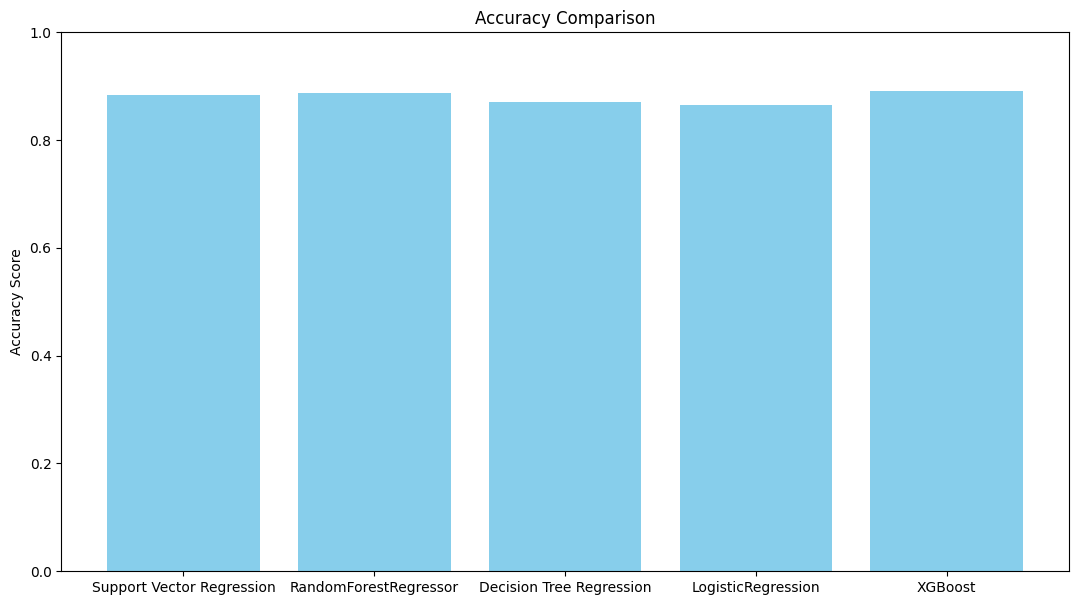

In [52]:
# Bar chart for R-squared scores
plt.figure(figsize=(13, 7))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Adjust the y-axis range if necessary
plt.show()